<a href="https://colab.research.google.com/github/hiu04/Data-Science/blob/main/A1_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Descriptive Statistics and Probability Theory


*Author: Xiaoyu Ma*

*Date: May 23 2023*

**Scenario**


You are a data analyst at an e-commerce company that sells a variety of products. Your company wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.

You have been provided with data includes information about the product, the region where the product was sold, the price of the product, the number of units sold, and the date of the sale.

Your task is to clean the data as you see fit, and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis, be sure to answer the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

## Load data and packages

In [ ]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [ ]:
# Glimpse the original data
df = pd.read_csv("/content/sales_data.csv")
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


There are two categorical variables (Product and Region), two numerical variables (Price and Units Sold), and on date variable (Sale Date). It also shows that there are 1050 observations. However, there are some missing values in the dataset. For instance, there are approximate 100 missing values for vairable Product and data manipulation may be needed in this case. In addition, the data contains observations from Jan 1 2022 to Sep 26 2024.

In [ ]:
df.describe()

,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000




1. The mean price of products is 108.63 while the median is only 64.64. The distribution of "Price" would be skewed, which will be demostrated in the histogram. The table also indicates that half of the product prices concentrate from 26.42 to 142.31. 

2. The mean and median units sold are both 10, which shows that the distribution is not skewed. The minimum unists sold is 2 while the largest number of sold units is 22. In addition, half of the observations have units sold from 8 to 12.




## Data Manipulation

Since we are interested in the sales performance, we first combine two numerical variables Price and Units Sold, called sales. Notice that there are some missing values for this two variable, we decide to replace the null values with median values. The reason why to choose median for variable Price is the skewness of the distribution due to the an extreme high price.

In [ ]:
# Replace null with median price for variable Price
df["Price"] = df["Price"].fillna(df["Price"].median())

In [ ]:
# Similar for variable Units Sold
df["Units Sold"] = df["Units Sold"].fillna(df["Units Sold"].median())

In [ ]:
# Create a new variable Sales = Price * Units Sold
df["Sales"] = df["Price"] * df["Units Sold"]

In [ ]:
df.describe()

,Price,Units Sold,Sales
count,1050.000000,1050.000000,1050.000000
mean,104.229210,10.180000,1080.845010
std,159.301875,3.078103,2041.480644
min,0.190000,2.000000,1.750000
25%,30.267500,8.000000,280.922500
50%,64.640000,10.000000,639.350000
75%,130.352500,12.000000,1280.347500
max,2636.900000,22.000000,38169.000000


Missing values in the dataset are dropped after replacing the median values of the sales because Sales is the response variable.

In [ ]:
# Drop null and update
df = df.dropna()

Outliers have sales greater than 10000 are also dropped since they are not representative of the sales performance.

In [ ]:
# Find outliers
df[df["Sales"] > 10000]

,Product,Region,Price,Units Sold,Sale Date,Sales
269,Product_49,Region_8,1296.0,14.0,2022-09-27,18144.0
407,Product_27,Region_7,1793.9,9.0,2023-02-12,16145.1
421,Product_34,Region_2,2636.9,14.0,2023-02-26,36916.6


In [ ]:
# Drop and update
df = df.drop([269,407,421])

In [ ]:
# View the data again and check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 1 to 1048
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     848 non-null    object 
 1   Region      848 non-null    object 
 2   Price       848 non-null    float64
 3   Units Sold  848 non-null    float64
 4   Sale Date   848 non-null    object 
 5   Sales       848 non-null    float64
dtypes: float64(3), object(3)
memory usage: 46.4+ KB


In [ ]:
df.describe(include = "all")

,Product,Region,Price,Units Sold,Sale Date,Sales
count,848,848,848.000000,848.000000,848,848.000000
unique,50,10,NaN,NaN,807,NaN
top,Product_4,Region_5,NaN,NaN,2022-01-02,NaN
freq,28,100,NaN,NaN,2,NaN
mean,NaN,NaN,95.142559,10.224057,NaN,974.223243
std,NaN,NaN,94.183822,3.117803,NaN,1041.056714
min,NaN,NaN,0.190000,2.000000,NaN,1.750000
25%,NaN,NaN,31.617500,8.000000,NaN,296.320000
50%,NaN,NaN,64.640000,10.000000,NaN,636.810000
75%,NaN,NaN,125.582500,12.000000,NaN,1261.590000


Now, there are only 848 observations in the dataset and 6 variables. 

## Data Visualization

The following discussions would focus on statistics of frequency and median. The reaosn why the median is chosen is the right-skewed distrbution of sales performance so median of sales would be more representative of the whole data.

### Individual variable

* Product

In [ ]:
# Products with the fewest sales record with meidan of sales value
df.groupby(df["Product"])["Sales"].describe().sort_values("count")\
 [["count","50%"]].head().transpose()

Product,Product_47,Product_39,Product_18,Product_14,Product_11
count,10.0,10.00,11.00,12.000,12.000
50%,598.9,786.24,1272.36,629.275,889.505


In [ ]:
# # Products with the most sales record with meidan of sales value
df.groupby(df["Product"])["Sales"].describe().sort_values("count")\
 [["count","50%"]].tail().transpose()

Product,Product_50,Product_8,Product_43,Product_24,Product_4
count,23.00,24.000,25.00,27.00,28.00
50%,1203.52,442.345,581.76,502.46,579.48


Product_47 and Product_39 are the least popular products with only 10 purchase respectively while product_4 is the most famous one with 28 purchase, followed by Product_24 with 27 sales.

In [ ]:
# Products have smallest price sort by median
df.groupby(df["Product"])['Price'].describe().sort_values('50%')\
[['mean','50%', 'std']].head().transpose()

Product,Product_3,Product_2,Product_15,Product_16,Product_31
mean,65.498500,60.401333,87.897000,76.726429,100.030000
50%,41.105000,41.680000,45.030000,47.165000,48.330000
std,67.551584,53.417447,99.768805,100.087444,110.359726


In [ ]:
# Products have highest price sort by median
df.groupby(df["Product"])['Price'].describe().sort_values('50%')\
[['mean','50%','std']].tail().transpose()

Product,Product_34,Product_18,Product_39,Product_17,Product_50
mean,104.641875,113.328182,125.151000,114.040000,168.466522
50%,97.260000,97.780000,98.280000,111.230000,141.530000
std,72.047287,113.434273,100.607021,72.179057,157.163677


In [ ]:
# df.groupby(df["Product"])['Price'].describe().sort_values('50%')[['mean','50%','std']]

Product 50 is the most expensive one with greatest average price of 168 during this period. Since the standard deviation of product 50 is great as well, it indicates that the price of this product changes significantly. For those cheaper products such as product 2 and 3, boht of them have smaller standard deviation while the price of product 16 and 31 have obvious change in this period though they have small median prices.

In [ ]:
# Products with greatest median sales value
df.groupby(df['Product'])['Sales'].describe().sort_values('50%')\
 [['count','50%']].tail().transpose()

Product,Product_34,Product_23,Product_19,Product_50,Product_18
count,16.00,21.00,20.00,23.00,11.00
50%,931.65,975.92,1022.64,1203.52,1272.36


In [ ]:
# Products with lowest median sales value
df.groupby(df['Product'])['Sales'].describe().sort_values('50%')\
 [['count','50%']].head().transpose()

Product,Product_31,Product_25,Product_2,Product_3,Product_48
count,15.00,13.0,15.00,20.000,16.000
50%,338.31,359.6,359.94,375.455,379.315


Product_31 has the lowest median sales price with only 338.31, followed by Product_25 and Product_2 have median sales around 360. The maximum median sales is 1272 from Product_18 and Product_50 has a similar median sales value of 1204.

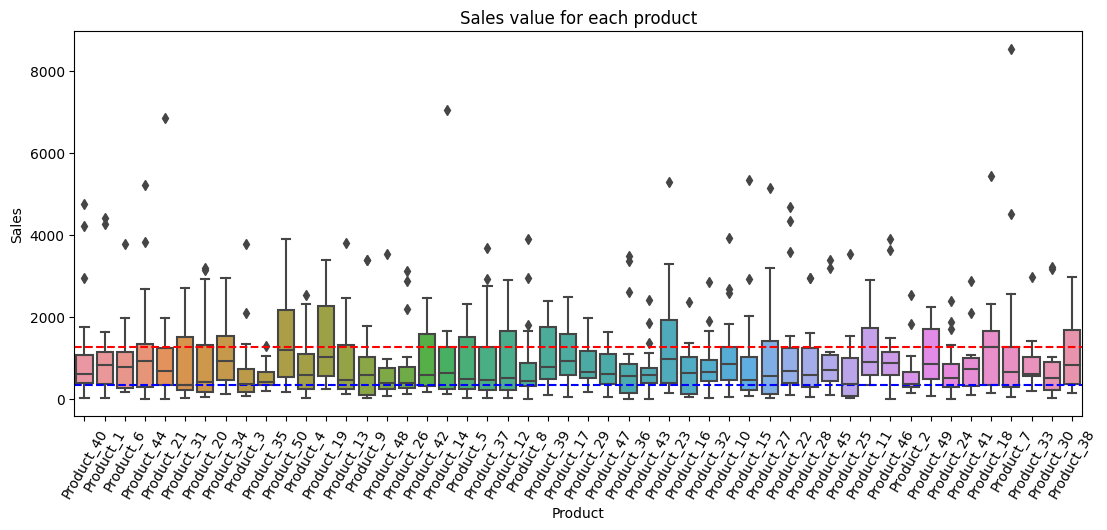

In [72]:
# Product vs. Sales
from matplotlib import pyplot as plt
plt.figure(figsize=(13,5))

plot1 = sns.boxplot(x = "Product",
                    y = "Sales",
                    data = df)
plot1.tick_params(axis='x', rotation=60)
plt.title("Sales value for each product")
plt.axhline(y= df.groupby(df['Product'])['Sales'].median().max(),
             color = "red", linestyle = "dashed")
plt.axhline(y= df.groupby(df['Product'])['Sales'].median().min(),
             color = "blue", linestyle = "dashed")

The boxplots indicating the sales performance on different products, the graph shows Product_18 has the greatest median sales value. Product_19, 50 and Product_23 have high sales value as well, which aligns the results from table above. The plot also tells Product_31 has the lowest sales value. From another aspect, Product_50, 19, 23, 27 have greater range of sales price compared to other products, which may shows that the price and the number of sales of those products are vary by time. In addition, there are some extreme high sales value for product 7, 14 and 21.

* Region vs. Sales

In [ ]:
df.groupby(df["Region"])["Sales"].describe().sort_values("count")\
 [["count","mean","50%"]].transpose()

Region,Region_6,Region_4,Region_1,Region_3,Region_10,Region_8,Region_7,Region_2,Region_9,Region_5
count,77.00000,79.000000,80.000000,81.00000,84.000000,84.000000,86.000000,87.00,90.000000,100.0000
mean,1114.39026,868.571392,994.944375,833.57642,1094.201667,1037.022262,827.707558,1089.08,916.378222,971.7122
50%,681.60000,524.300000,679.030000,581.76000,646.400000,808.200000,489.375000,598.59,646.400000,614.1100


Region 6 and 4 have the fewest consumption record that are lower than 80 observations. On the other hand, people in region 9 and 5 are more willing to buy since there are 90 and 100 consumption records, respetively.

In [ ]:
# Sort from least sales region to greatest sales region
df.groupby("Region")['Sales'].describe().sort_values('50%') \
 [['50%','count']].transpose()

Region,Region_7,Region_4,Region_3,Region_2,Region_5,Region_10,Region_9,Region_1,Region_6,Region_8
50%,489.375,524.3,581.76,598.59,614.11,646.4,646.4,679.03,681.6,808.2
count,86.000,79.0,81.00,87.00,100.00,84.0,90.0,80.00,77.0,84.0


The sales performance indicated by the median of sales value is worst in region 7, followed by region 4. Region 6 and 8 have the best sales performance. In particular, the median of sales value in region 8 is 808, which is much greater than the median is region 6 of 682.

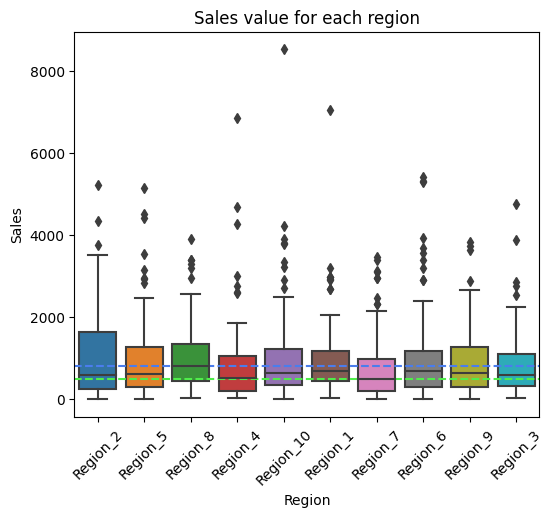

In [ ]:
# Region vs. Sales
plt.figure(figsize=(6,5))

plot1 = sns.boxplot(x = "Region",
                    y = "Sales",
                    data = df)
plot1.tick_params(axis='x', rotation=45)
plt.title("Sales value for each region")
plt.axhline(y= df.groupby(df['Region'])['Sales'].median().max(),
             color = "#4A7DED", linestyle = "dashed")
plt.axhline(y= df.groupby(df['Region'])['Sales'].median().min(),
             color = "#4FED4A", linestyle = "dashed")

The highest sales values take place in Region 8 and 6. Region 7, 4 have the wrost sales performance oppositely. Moreover, outliers in region 4, 10 and 1 
are noticed in the plot as well.


### Multi-variables 

* (Region & Product) vs. Sales

In [ ]:
# Create a list named region to obtain all unique regions in the data
region = df['Region'].unique().tolist()

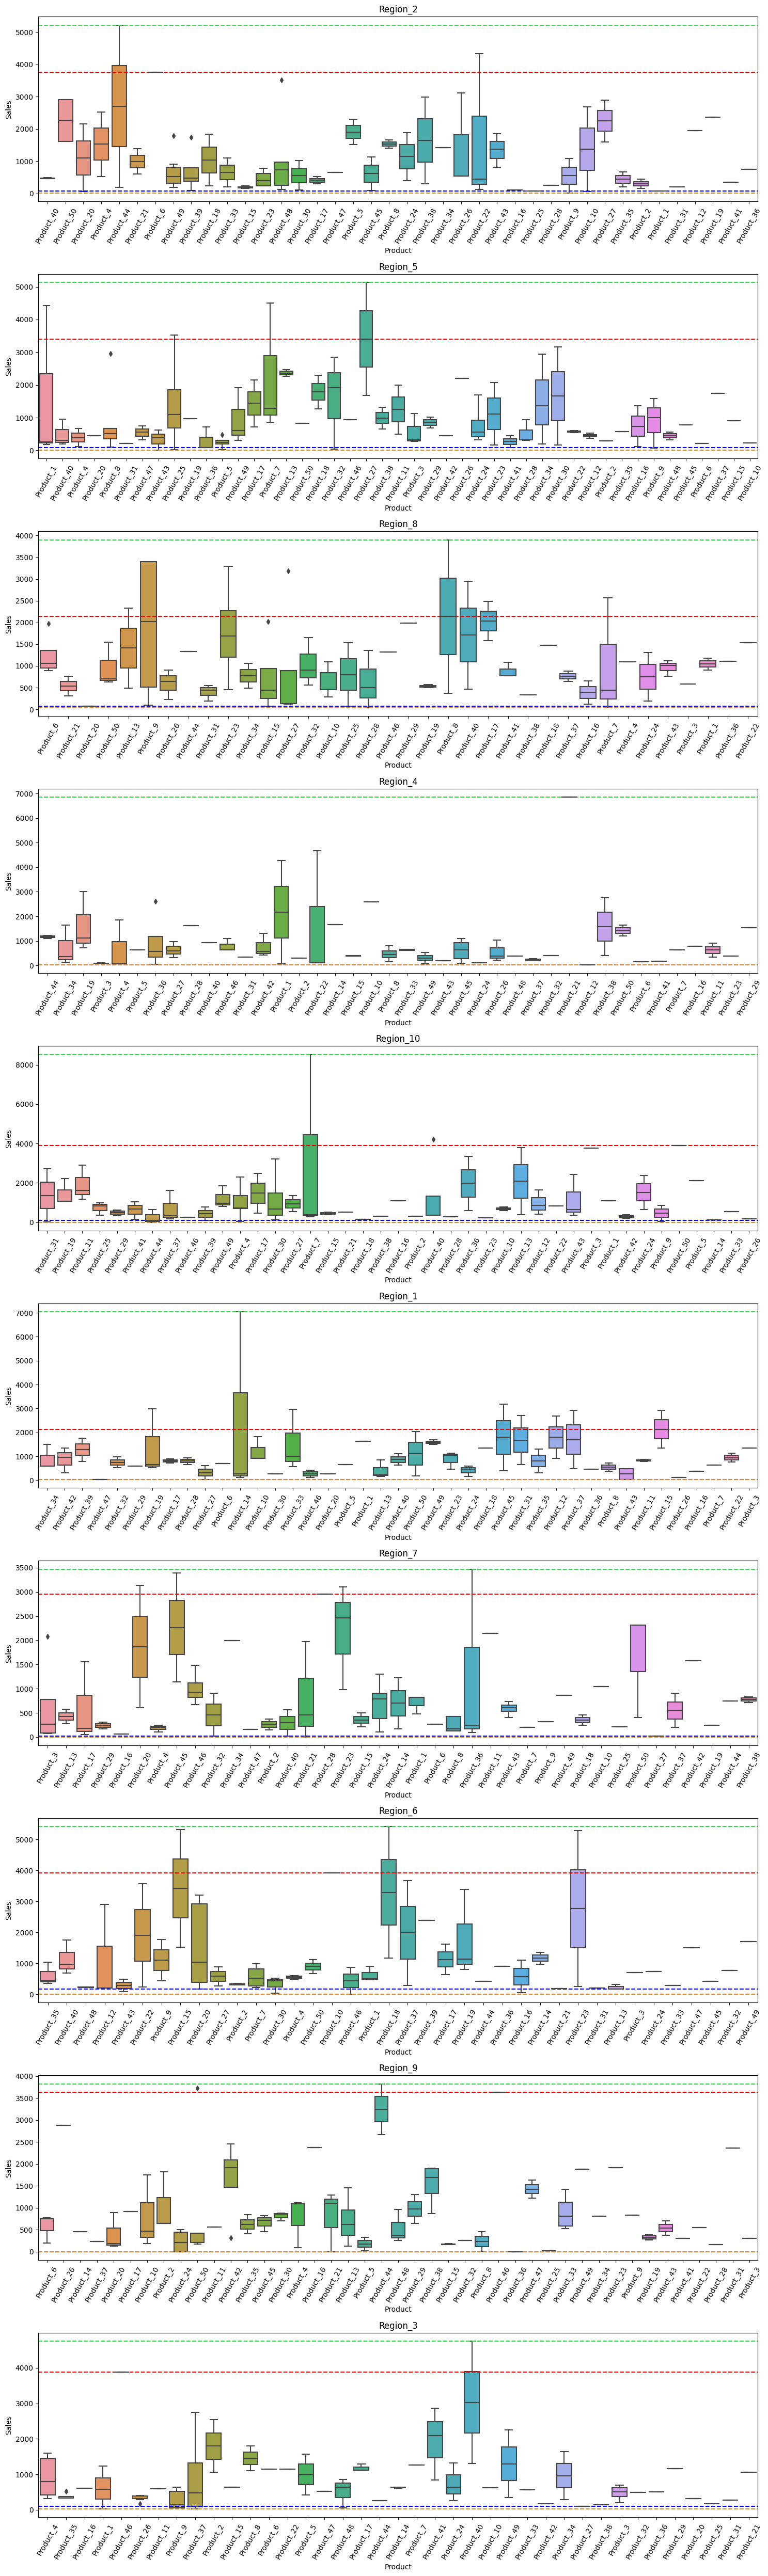

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(15,50))

for i in range(len(region)):
  data = df[df['Region'] == (region[i])]
  plot = sns.boxplot(ax = ax[i],
            x = "Product",
            y = "Sales",
            data = data)
  ax[i].tick_params(axis='x', rotation=60)
  ax[i].set_title(region[i])
  # Red line: highest median sales value
  ax[i].axhline(y= df.groupby(data['Product'])['Sales'].median().max(), 
                color = "red", linestyle = "dashed")
  # Blue line: lowest median sales value
  ax[i].axhline(y= df.groupby(data['Product'])['Sales'].median().min(), 
                color = "blue", linestyle = "dashed")
  # Green line: highest sales value
  ax[i].axhline(y= data['Sales'].max(), color = "#30D949", linestyle = "dashed")
  # Yellow line: lowest sales value
  ax[i].axhline(y= data['Sales'].min(), color = "#D98B32", linestyle = "dashed")

fig.tight_layout()

## Summary and Recommandations

In [ ]:
for i in range(len(region)):
  data = df[df['Region'] == (region[i])]
  print(region[i])
  print("Product with highest total revenue:\n", 
        data.loc[data['Sales'] == data['Sales'].max()]['Product']) 
  print("Product with lowest total revenue:\n", 
        data.loc[data["Sales"] == data["Sales"].min()]['Product']) 
  print("Products with greatest number of comsumption record:\n", 
        data.loc[data['Units Sold'] == data['Units Sold'].max()]["Product"]) 
  print("Products with smallest number of comsumption record:\n",
        data.loc[data['Units Sold'] == data['Units Sold'].min()]["Product"]) 
  print("-------------------------------------------")

Region_2
Product with highest total revenue:
 85    Product_44
Name: Product, dtype: object
Product with lowest total revenue:
 666    Product_9
Name: Product, dtype: object
Products with greatest number of comsumption record:
 108    Product_49
Name: Product, dtype: object
Products with smallest number of comsumption record:
 223    Product_48
440    Product_45
466    Product_22
594    Product_22
Name: Product, dtype: object
-------------------------------------------
Region_5
Product with highest total revenue:
 451    Product_27
Name: Product, dtype: object
Product with lowest total revenue:
 791    Product_43
Name: Product, dtype: object
Products with greatest number of comsumption record:
 399    Product_4
Name: Product, dtype: object
Products with smallest number of comsumption record:
 739    Product_16
Name: Product, dtype: object
-------------------------------------------
Region_8
Product with highest total revenue:
 232    Product_8
Name: Product, dtype: object
Product with 

* Summary

To summarize, the dataset contains sales record from Jan 1 2022 to Sep 26 2024. We found that product 4, 8, 24, 43, and 50 have the most consumption records while product 11, 14, 18, 39, and 47 have the least. In addition, people in region 5 and 9 are more willing to buy, by contrast, people living in region 4 and 6 have least interest to buy products. The higher consumption frequency may also showing that the population in those region is greater.

Regarding the total revenue from buying those 50 products, it is observed that product 34, 23, 19, 50 and 18 have the smallest total sales value. Product 31, 25, 2, 3, and 48 have the greatest sales value. It is interesting to find that the products with greatest revenue have smaller median price retively, thus, many people like to buy those products. On the other hand, region 6 and 8 have the biggest total revenue, region 4 and 7 are the opposite.

* Suggestions

In order to create higher revenue, the company can promote the famous products in its region, especially in the region where people are more willing to buy or with greater population. For instance, the company can promote product 4 in region 5 and product 15 in region 9. Notice that this the median price of these two products are not relatively high, thus, some products with similar prices can also promoted such as product 16 to region 9 and product 28 to region 5.

The sale performance in region 4 should be highlighted since the citizens there do not have many consumption records and the total revenue created from thse 50 products is not high in this region as well. However, their perferences of prducts are vary by viewing many consumption records of product 28, 50 and 11. In particular, product 50 is one of the most expensive products. This states that the citizens in region actually have ability to afford expensive products but the number of residences in region 4 is small so the total revenue and consumptions frequency are not outstanding. Therefore, keeping promoting product 50 in this region is plausible and promotion of other expensive products are considerable in this region as well to increase the total revenue.